In [1]:
import os
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import get_file

from deepcell.utils.plot_utils import create_rgb_image
from deepcell.datasets import SpotNetExampleData
from deepcell_spots.applications import SpotDetection

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [2]:
data = SpotNetExampleData()

In [3]:
spots_image = data.load_data(file='seqFISH_example')
spots_image.shape

(1, 2048, 2048, 1)

In [4]:
app = SpotDetection()

INFO:root:Checking for cached data
INFO:root:Checking SpotDetection-7.tar.gz against provided file_hash...
INFO:root:SpotDetection-7.tar.gz with hash f52d473ad7e4ce33472f1a9a9cae2d85 not found in /root/.deepcell/models
INFO:root:Making request to server
INFO:root:Downloading models/SpotDetection-7.tar.gz with size 18.3 MB to /root/.deepcell/models
18.3MB [00:00, 46.9MB/s]                                                                               
INFO:root:🎉 Successfully downloaded file to /root/.deepcell/models/SpotDetection-7.tar.gz
INFO:root:Extracting /root/.deepcell/models/SpotDetection-7.tar.gz
INFO:root:Successfully extracted /root/.deepcell/models/SpotDetection-7.tar.gz into /root/.deepcell/models
2023-09-04 03:08:12.198104: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operatio

In [5]:
pred = app.predict(spots_image)

INFO:root:Converting image dtype to float
2023-09-04 03:08:29.722482: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


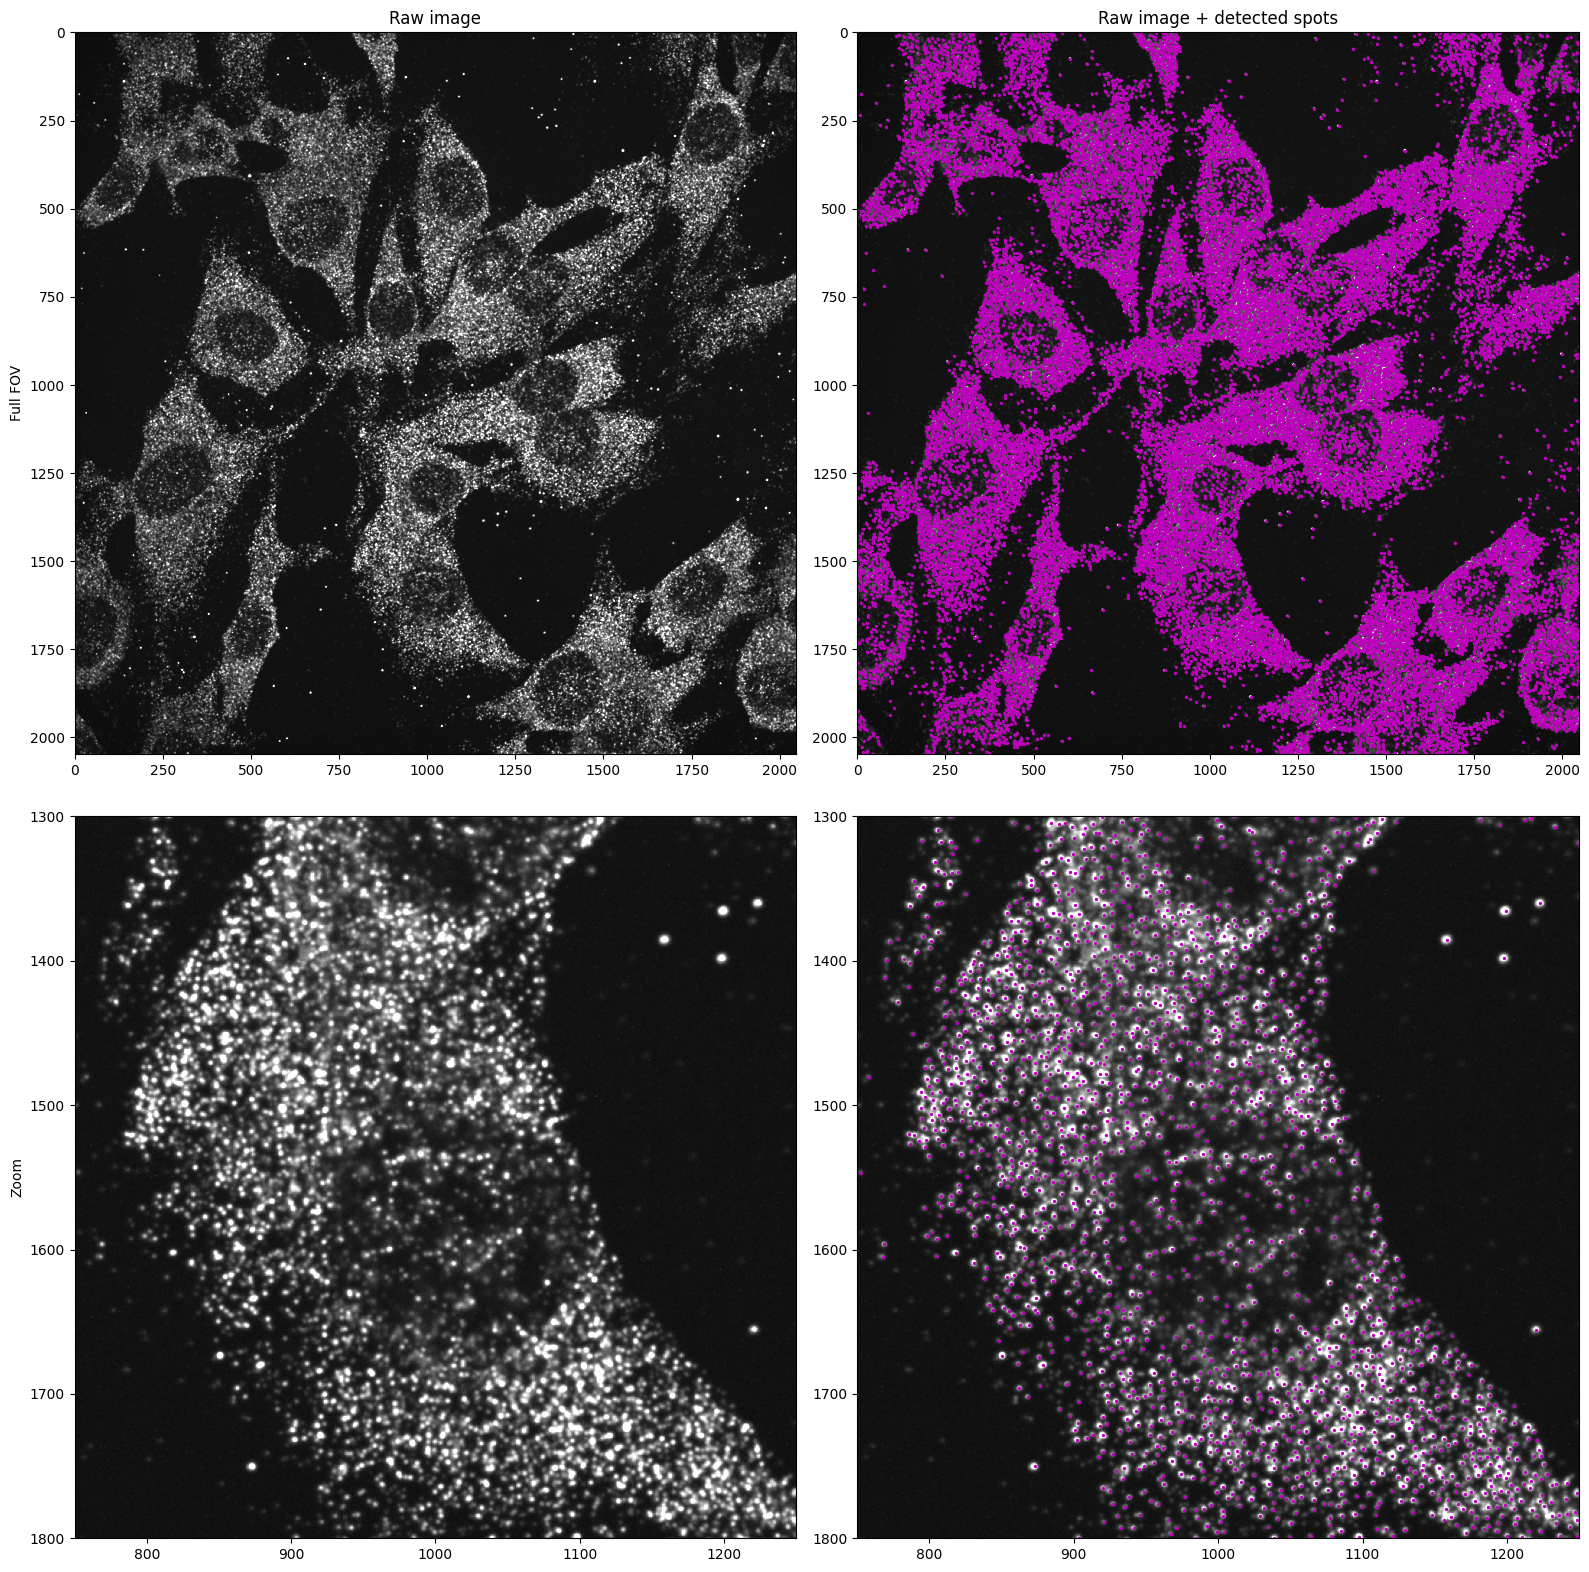

In [6]:
fig,ax = plt.subplots(2,2,figsize=(16,16))

for i in range(2):
    ax[i,0].imshow(spots_image[0,...,0], cmap='gray', vmax=3000)
    ax[i,1].imshow(spots_image[0,...,0], cmap='gray', vmax=3000)
    ax[i,1].scatter(pred[0][:,1], pred[0][:,0], c='m', s=2)

    # zoom
    ax[1,i].set_xlim([750,1250])
    ax[1,i].set_ylim([1800,1300])
    
ax[0,0].set_title('Raw image')
ax[0,1].set_title('Raw image + detected spots')
ax[0,0].set_ylabel('Full FOV')
ax[1,0].set_ylabel('Zoom')

plt.tight_layout()
plt.show()